In [7]:
import pandas as pd

df = pd.read_csv("/kaggle/input/dataset.csv")
print(df.head())


   Unnamed: 0                track_id                 artists  \
0           0  5SuOikwiRyPMVoIQDJUgSV             Gen Hoshino   
1           1  4qPNDBW1i3p13qLCt0Ki3A            Ben Woodward   
2           2  1iJBSr7s7jYXzM8EGcbK5b  Ingrid Michaelson;ZAYN   
3           3  6lfxq3CG4xtTiEg7opyCyx            Kina Grannis   
4           4  5vjLSffimiIP26QG5WcN2K        Chord Overstreet   

                                          album_name  \
0                                             Comedy   
1                                   Ghost (Acoustic)   
2                                     To Begin Again   
3  Crazy Rich Asians (Original Motion Picture Sou...   
4                                            Hold On   

                   track_name  popularity  duration_ms  explicit  \
0                      Comedy          73       230666     False   
1            Ghost - Acoustic          55       149610     False   
2              To Begin Again          57       210826     False   


Original shape: (114000, 21)
After dropping nulls: (113999, 21)
Categorical columns: ['explicit']
Numeric columns: ['Unnamed: 0', 'popularity', 'duration_ms', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature']
📈 Perceptron Accuracy: 0.15350877192982457

Classification Report (Perceptron):
                   precision    recall  f1-score   support

         acoustic       0.75      0.15      0.25        60
         afrobeat       0.57      0.47      0.51        60
         alt-rock       0.43      0.15      0.22        60
      alternative       0.26      0.32      0.29        60
          ambient       0.48      0.52      0.50        60
            anime       0.14      0.27      0.18        60
      black-metal       0.73      0.37      0.49        60
        bluegrass       0.00      0.00      0.00        60
            blues       0.00      0.00      0.00        60
           brazi

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


🎧 SVM Accuracy: 0.687

Classification Report (SVM):
                   precision    recall  f1-score   support

         acoustic       0.78      0.72      0.75        60
         afrobeat       0.88      0.85      0.86        60
         alt-rock       0.48      0.53      0.50        60
      alternative       0.60      0.55      0.57        60
          ambient       0.68      0.70      0.69        60
            anime       0.57      0.65      0.60        60
      black-metal       0.70      0.83      0.76        60
        bluegrass       0.90      0.92      0.91        60
            blues       0.61      0.58      0.60        60
           brazil       0.71      0.60      0.65        60
        breakbeat       0.85      0.68      0.76        60
          british       0.61      0.47      0.53        60
         cantopop       0.65      0.83      0.73        60
    chicago-house       0.81      0.92      0.86        60
         children       0.67      0.72      0.69        60
   

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127926 (\N{MULTIPLE MUSICAL NOTES}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


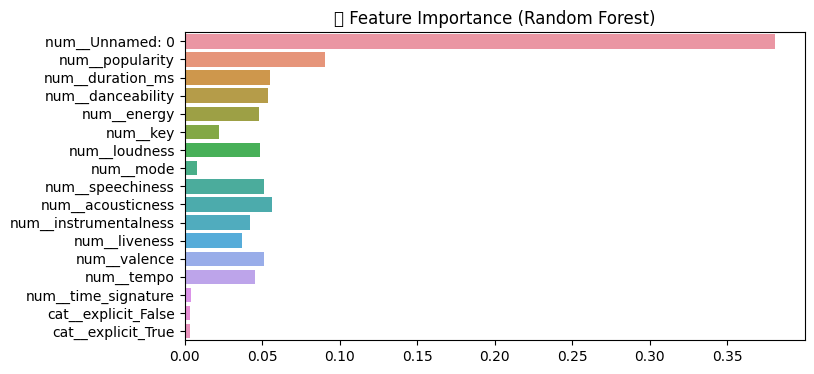

🧠 Neural Network Accuracy: 0.77

Classification Report (Neural Network):
                   precision    recall  f1-score   support

         acoustic       0.89      0.78      0.83        60
         afrobeat       0.85      0.88      0.87        60
         alt-rock       0.71      0.85      0.77        60
      alternative       0.80      0.75      0.78        60
          ambient       0.79      0.83      0.81        60
            anime       0.81      0.70      0.75        60
      black-metal       0.88      0.85      0.86        60
        bluegrass       0.88      0.97      0.92        60
            blues       0.67      0.72      0.69        60
           brazil       0.77      0.80      0.79        60
        breakbeat       0.86      0.82      0.84        60
          british       0.87      0.67      0.75        60
         cantopop       0.75      0.77      0.76        60
    chicago-house       0.91      0.97      0.94        60
         children       0.69      0.72   

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


NameError: name 'acc_perc' is not defined

In [9]:
# ==============================================================
# Step 1: Imports
# ==============================================================
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# ==============================================================
# Step 2: Load Dataset
# ==============================================================
data_path = "/kaggle/input/dataset.csv"
df = pd.read_csv(data_path)
print("Original shape:", df.shape)

# Drop rows with any missing values
df.dropna(inplace=True)
print("After dropping nulls:", df.shape)

# ==============================================================
# Step 3: Select balanced subset (400 samples per genre)
# ==============================================================
df_balanced = df.groupby('track_genre').sample(n=300, random_state=42).reset_index(drop=True)

# ==============================================================
# Step 4: Preprocessing — Drop unused text columns
# ==============================================================
drop_cols = ['track_id', 'artists', 'album_name', 'track_name']
df_balanced = df_balanced.drop(columns=drop_cols)

# ==============================================================
# Step 5: Identify features and target
# ==============================================================
target_col = 'track_genre'
features = [col for col in df_balanced.columns if col != target_col]

X = df_balanced[features]
y = df_balanced[target_col]

# ==============================================================
# Step 6: Handle categorical features
# ==============================================================
# Find non-numeric columns
categorical_cols = X.select_dtypes(include=['object', 'bool']).columns.tolist()
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("Categorical columns:", categorical_cols)
print("Numeric columns:", numeric_cols)

# One-hot encode categorical columns (e.g., 'explicit' if bool/object)
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ]
)

# Encode target labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# ==============================================================
# Step 7: Train-test split
# ==============================================================
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

# ==============================================================
# Add Perceptron Regression
# ==============================================================
from sklearn.linear_model import Perceptron

perceptron_pipeline = Pipeline([
    ('preprocess', preprocessor),
    ('perc', Perceptron(max_iter=1000, random_state=42))
])

perceptron_pipeline.fit(X_train, y_train)
y_pred_perc = perceptron_pipeline.predict(X_test)
print("📈 Perceptron Accuracy:", accuracy_score(y_test, y_pred_perc))
print("\nClassification Report (Perceptron):")
print(classification_report(y_test, y_pred_perc, target_names=le.classes_))


# ==============================================================
# Step 8: Support Vector Machine (SVM)
# ==============================================================
svm_pipeline = Pipeline([
    ('preprocess', preprocessor),
    ('svm', SVC(class_weight='balanced', random_state=42))
])

param_grid = {
    'svm__C': [1, 10, 50],
    'svm__gamma': [0.001, 0.01, 0.1],
    'svm__kernel': ['rbf', 'poly', 'sigmoid']
}


svm_grid = GridSearchCV(svm_pipeline, param_grid, cv=3, n_jobs=-1)
svm_grid.fit(X_train, y_train)
best_svm = svm_grid.best_estimator_

y_pred_svm = best_svm.predict(X_test)
acc_svm = accuracy_score(y_test, y_pred_svm)
print("🎧 SVM Accuracy:", round(acc_svm, 3))
print("\nClassification Report (SVM):")
print(classification_report(y_test, y_pred_svm, target_names=le.classes_))

# ==============================================================
# Step 9: Random Forest
# ==============================================================
rf_pipeline = Pipeline([
    ('preprocess', preprocessor),
    ('rf', RandomForestClassifier(
        n_estimators=500,
        max_depth=None,
        min_samples_split=5,
        class_weight='balanced',
        random_state=42,
        n_jobs=-1
    ))
])

rf_pipeline.fit(X_train, y_train)
y_pred_rf = rf_pipeline.predict(X_test)
acc_rf = accuracy_score(y_test, y_pred_rf)
print("🌲 Random Forest Accuracy:", round(acc_rf, 3))
print("\nClassification Report (Random Forest):")
print(classification_report(y_test, y_pred_rf, target_names=le.classes_))

# Optional: Feature importance (approximation)
rf_model = rf_pipeline.named_steps['rf']
X_preprocessed = preprocessor.fit_transform(X)
if hasattr(rf_model, "feature_importances_"):
    importances = rf_model.feature_importances_
    plt.figure(figsize=(8,4))
    sns.barplot(x=importances, y=preprocessor.get_feature_names_out())
    plt.title("🎶 Feature Importance (Random Forest)")
    plt.show()

# ==============================================================
# Step 10: Neural Network
# ==============================================================
nn_pipeline = Pipeline([
    ('preprocess', preprocessor),
    ('mlp', MLPClassifier(
        hidden_layer_sizes=(64,),    # single hidden layer
        activation='logistic',       # sigmoid
        alpha=0.001,                 # L2 regularization
        solver='adam',
        max_iter=600,
        random_state=42
    ))
])


nn_pipeline.fit(X_train, y_train)
y_pred_nn = nn_pipeline.predict(X_test)
acc_nn = accuracy_score(y_test, y_pred_nn)
print("🧠 Neural Network Accuracy:", round(acc_nn, 3))
print("\nClassification Report (Neural Network):")
print(classification_report(y_test, y_pred_nn, target_names=le.classes_))


results = {
    'Model': ['Perceptron', 'SVM', 'Random Forest', 'Neural Net'],
    'Accuracy': [acc_perc, acc_svm, acc_rf, acc_nn]
}
results_df = pd.DataFrame(results)
display(results_df)


**Paper Implementation**

In [1]:
# ==============================================================
# classic_ml_models_with_cv.py
# ==============================================================
import pandas as pd
import numpy as np
import pickle, joblib, os
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score, classification_report

# ==============================================================
# Step 1: Load & clean data
# ==============================================================
data_path = "/kaggle/input/dataset.csv"
df = pd.read_csv(data_path)
print("Original shape:", df.shape)
df.dropna(inplace=True)
print("After dropping nulls:", df.shape)

# Balanced subset
df_balanced = df.groupby('track_genre').sample(n=300, random_state=42).reset_index(drop=True)

# Drop unused columns
drop_cols = ['track_id', 'artists', 'album_name', 'track_name']
df_balanced.drop(columns=drop_cols, inplace=True)

# ==============================================================
# Step 2: Split features / labels
# ==============================================================
target_col = 'track_genre'
X = df_balanced.drop(columns=[target_col])
y = df_balanced[target_col]

categorical_cols = X.select_dtypes(include=['object', 'bool']).columns.tolist()
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

preprocessor_scaled = ColumnTransformer([
    ('num', StandardScaler(), numeric_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
])

preprocessor_unscaled = ColumnTransformer([
    ('num', 'passthrough', numeric_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
])

# Encode target labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Train-test split (for later reports)
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

os.makedirs("saved_models", exist_ok=True)

# ==============================================================
# Step 3: Define models
# ==============================================================
models = {
    "Perceptron": Perceptron(max_iter=1000, random_state=42),
    "RBF SVM": SVC(kernel="rbf", class_weight="balanced", random_state=42),
    "Sig SVM": SVC(kernel="sigmoid", class_weight="balanced", random_state=42),
    "Poly SVM": SVC(kernel="poly", class_weight="balanced", random_state=42)
}

# ==============================================================
# Step 4: 5-fold cross-validation (scaled & unscaled)
# ==============================================================
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
results = []

for scale_name, preproc in [("Scaled", preprocessor_scaled), ("Unscaled", preprocessor_unscaled)]:
    for model_name, model in models.items():
        pipe = Pipeline([('preprocess', preproc), ('clf', model)])
        scores = cross_val_score(pipe, X, y_encoded, cv=cv, scoring='accuracy', n_jobs=-1)
        results.append({
            "Model": model_name,
            "Scaled/Unscaled": scale_name,
            "Mean Accuracy": round(scores.mean(), 3),
            "Std": round(scores.std(), 3)
        })
        print(f"{model_name} ({scale_name}) -> {scores.mean():.3f} (±{scores.std():.3f})")

# ==============================================================
# Step 5: Save CV summary table
# ==============================================================
cv_results = pd.DataFrame(results)
cv_results.to_csv("saved_models/cv_results_table.csv", index=False)
print("\n📊 Cross-Validation Summary (Table 1):\n")
print(cv_results.pivot(index="Model", columns="Scaled/Unscaled", values="Mean Accuracy").round(3))
print("\n✅ Saved as 'saved_models/cv_results_table.csv'")

# ==============================================================
# Step 6: Fit best models on full training set (optional)
# ==============================================================
# Example: Random Forest (keep same as before for fairness)
rf_pipe = Pipeline([
    ('preprocess', preprocessor_scaled),
    ('rf', RandomForestClassifier(
        n_estimators=500, min_samples_split=5,
        class_weight='balanced', random_state=42, n_jobs=-1))
])
rf_pipe.fit(X_train, y_train)
y_pred_rf = rf_pipe.predict(X_test)
acc_rf = accuracy_score(y_test, y_pred_rf)
print("\n🌲 Random Forest Test Accuracy:", round(acc_rf, 3))
print(classification_report(y_test, y_pred_rf, target_names=le.classes_))
joblib.dump(rf_pipe, "saved_models/random_forest.pkl")

# Save label encoder
with open("saved_models/label_encoder.pkl", "wb") as f:
    pickle.dump(le, f)


Original shape: (114000, 21)
After dropping nulls: (113999, 21)
Perceptron (Scaled) -> 0.151 (±0.008)
RBF SVM (Scaled) -> 0.514 (±0.004)
Sig SVM (Scaled) -> 0.290 (±0.007)
Poly SVM (Scaled) -> 0.461 (±0.002)
Perceptron (Unscaled) -> 0.020 (±0.004)
RBF SVM (Unscaled) -> 0.161 (±0.002)
Sig SVM (Unscaled) -> 0.022 (±0.003)
Poly SVM (Unscaled) -> 0.125 (±0.004)

📊 Cross-Validation Summary (Table 1):

Scaled/Unscaled  Scaled  Unscaled
Model                            
Perceptron        0.151     0.020
Poly SVM          0.461     0.125
RBF SVM           0.514     0.161
Sig SVM           0.290     0.022

✅ Saved as 'saved_models/cv_results_table.csv'

🌲 Random Forest Test Accuracy: 0.861
                   precision    recall  f1-score   support

         acoustic       0.98      1.00      0.99        60
         afrobeat       1.00      0.95      0.97        60
         alt-rock       0.94      0.97      0.95        60
      alternative       0.92      0.97      0.94        60
          ambi

In [ ]:
Neural network

Epoch 0: Train Acc=33.33%, Test Acc=33.33%
Epoch 20: Train Acc=33.33%, Test Acc=33.33%
Epoch 40: Train Acc=33.33%, Test Acc=33.33%
Epoch 60: Train Acc=33.33%, Test Acc=33.33%
Epoch 80: Train Acc=37.50%, Test Acc=33.33%
Epoch 100: Train Acc=49.17%, Test Acc=50.00%
Epoch 120: Train Acc=64.17%, Test Acc=66.67%
Epoch 140: Train Acc=71.67%, Test Acc=66.67%


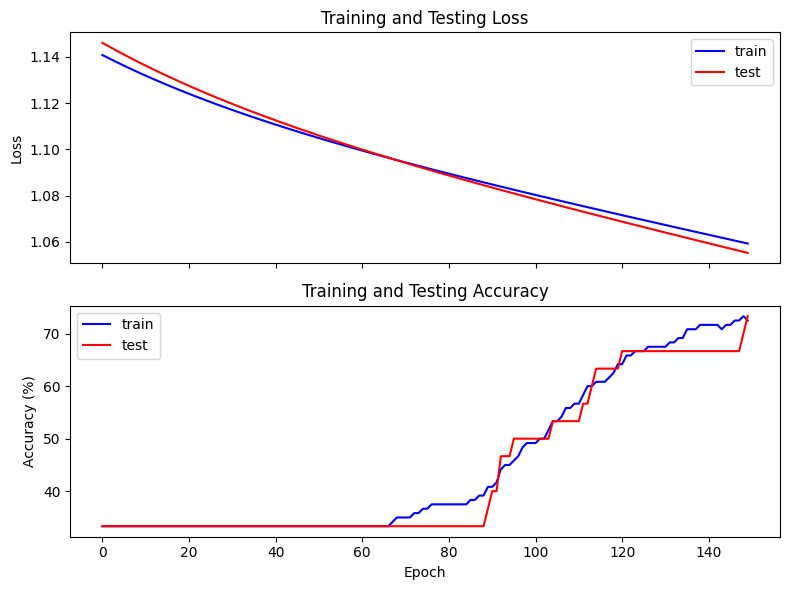

In [5]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

# ----------------------------------------------------------
# 1️⃣ Load and preprocess data
# ----------------------------------------------------------
data = load_iris()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.factorize(data.target)[0]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

# ----------------------------------------------------------
# 2️⃣ Define neural network
# ----------------------------------------------------------
class SimpleNN(nn.Module):
    def __init__(self, input_dim, hidden_dim):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.sigmoid = nn.Sigmoid()
        self.fc2 = nn.Linear(hidden_dim, 3)
        self.logsoftmax = nn.LogSoftmax(dim=1)

    def forward(self, x):
        x = self.sigmoid(self.fc1(x))
        x = self.logsoftmax(self.fc2(x))
        return x

# ----------------------------------------------------------
# 3️⃣ Initialize model, optimizer, and loss
# ----------------------------------------------------------
model = SimpleNN(input_dim=X_train.shape[1], hidden_dim=10)
optimizer = optim.SGD(model.parameters(), lr=0.01, weight_decay=0.001)  # L2 regularization
criterion = nn.NLLLoss()

# ----------------------------------------------------------
# 4️⃣ Train and record loss + accuracy
# ----------------------------------------------------------
epochs = 150
train_losses, test_losses = [], []
train_accuracies, test_accuracies = [], []

for epoch in range(epochs):
    # Training
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()
    
    # Record train loss
    train_losses.append(loss.item())
    
    # Compute accuracies
    with torch.no_grad():
        preds_train = torch.argmax(outputs, dim=1)
        train_acc = (preds_train == y_train_tensor).float().mean().item() * 100
        
        test_outputs = model(X_test_tensor)
        test_loss = criterion(test_outputs, y_test_tensor).item()
        preds_test = torch.argmax(test_outputs, dim=1)
        test_acc = (preds_test == y_test_tensor).float().mean().item() * 100
        
    test_losses.append(test_loss)
    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)

    if epoch % 20 == 0:
        print(f"Epoch {epoch}: Train Acc={train_acc:.2f}%, Test Acc={test_acc:.2f}%")

# ----------------------------------------------------------
# 5️⃣ Plot Loss and Accuracy curves (like Fig. 2)
# ----------------------------------------------------------
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 6), sharex=True)

# Loss curve
ax1.plot(train_losses, label='train', color='blue')
ax1.plot(test_losses, label='test', color='red')
ax1.set_ylabel('Loss')
ax1.legend()
ax1.set_title('Training and Testing Loss')

# Accuracy curve
ax2.plot(train_accuracies, label='train', color='blue')
ax2.plot(test_accuracies, label='test', color='red')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy (%)')
ax2.legend()
ax2.set_title('Training and Testing Accuracy')

plt.tight_layout()
plt.show()

# ----------------------------------------------------------
# 6️⃣ Save data for later analysis
# ----------------------------------------------------------
metrics_df = pd.DataFrame({
    'Epoch': range(epochs),
    'Train Loss': train_losses,
    'Test Loss': test_losses,
    'Train Accuracy': train_accuracies,
    'Test Accuracy': test_accuracies
})
metrics_df.to_csv("training_metrics.csv", index=False)

